In [1]:
using LinearAlgebra, FastGaussQuadrature, Plots
include("..\\Code_jail\\Misc.jl")
include("..\\Code_jail\\myquad.jl")

Hermite_quad (generic function with 1 method)

# Computing $\int_{-\infty}^{\infty}\exp(ikx-ω(k)t)g(k)\mathrm{d}k$, with $x\in\mathbb{C}$
## The integral
Say we have dispersion relation $ω(k)\in\mathbb{P}^n$, with $n≥2$ and a function $g(k)$ (restrictions on this aside from pole related stuff?). Assume $x\in\mathbb{C}$, we then aim to compute
$$
\int_{-\infty}^{\infty}\exp(ikx-ω(k)t)g(k)\mathrm{d}k,
$$
for a small $t$ where $g(k)$ has poles only on the real line. To this end, we compute a different integral. For this purpose, put $x$ into polar form: $x=re^{iϕ}$. The integral we wish to compute is 
$$
\int_{-\infty}^{\infty}\exp(ikx-ω(k)t)g(k)\mathrm{d}k\overset{kt^{1/n}e^{iϕ}=z}{=}\int_{\Gamma'}\exp(izt^{-1/n}r-ω(zt^{-1/n}e^{-iϕ})t)g(zt^{-1/n}e^{-iϕ})t^{1/n}e^{-iϕ}\mathrm{d}z,
$$
where $\Gamma' = \{re^{i\phi}|r \in\mathbb{R}\}$. This such that $ω(zt^{-1/n}e^{-iϕ})t → w_{n}e^{-inϕ}z^n$ as $t → 0$. For notation, define $$Ω₊=\{z|\mathcal{R}e(w_{n}e^{-inϕ}z^n)\geq0\}\text{ and }Ω₋=\{z|\mathcal{R}e(w_{n}e^{-inϕ}z^n)<0\}$$. Since $n>1$, however large $xt^{-1/n}$ might be, the method of steepest descent will take care of the first $izt^{-1/n}r$ term.

## The deformation
Now, why am I talking about the complex plane all of a suddon? Deformations, of course! Because of these poles, we deform to $\Gamma$. For this we need to suffice the need for $\mathcal{R}e(w_{n}e^{-inϕ}z^n)\geq0$ and deform into the rotated UHP. This necesity prohibits the integral itself from not even exist, namely if the starting and end point of the original path is in $Ω₋$. However, let's assume it's integrable, then we want $z\inΩ₊$ and in the rotated UHP. Define $w_{n}=w_r+w_ii$ and $z_{n}=z_r+z_ii=re^{iθ}$, we then find where $\mathcal{R}e(w_{n}e^{-inϕ}z^n)=0$:
$$
\mathcal{R}e((w_r+w_ii)e^{in(θ-ϕ)})= w_r\cos(n(\theta-\phi))-w_i\sin(n(\theta-\phi)) = 0 ⇒ θ_j = \frac{\arctan(w_r/w_i)+j\pi}{n}+ϕ,~~j\in\mathbb{Z},~ s.t.~~ θ_j \in [0, 2π).
$$
Since we need $z$ to be in UHP, $θⱼ-ϕ \in [0, π]$. 

For the deformation to happen, we aim to use Jordan's lemma. We make circle segments over $\Omega_+$. The integral over these will go to zero because of Jordan's lemma. Sadly, the rotated UHP does not consist of only $\Omega_+$. One could then deform to go back to zero, avoid $\Omega_-$ and then go back to infinity in $\Omega_+$. But the whole reason for deforming is so that we escape oscilatory behavior near $z=0$. Therefore, we need to go through the $\Omega_-$. For this we use steepest descent. Once we have this deformation path, we can use that $g$ and the exponential are analytic in the rotated UHP so get the integral we hope to get, through decomposing the full path into that over the real line and $\Gamma$. 

First we try to find the path through which we will go to and come back from infinity over the good regions $\Omega_+$. The main idea is that we aim to maximize $\mathcal{R}e(w_{n}e^{-inϕ}z^n)$ in every region. This is easy to find:
$$
f(z) = \mathcal{R}e(w_{n}e^{-inϕ}z^n) ⇒ f'(z) = \mathcal{R}e(nw_{n}e^{-inϕ}z^{n-1}) = nr\left(w_r\cos((n-1)\theta-nϕ )-w_i\sin((n-1)\theta-nϕ)\right) = 0⇒ θ_j = \frac{\arctan(w_r/w_i)+j\pi}{n-1}+\frac{n}{n-1}ϕ,~~j\in\mathbb{Z},~ s.t.~~ θ_j \in [0, π].
$$
I don't know if this is very true, but graphically it's easy to see that the path at which $\mathcal{R}e(w_{n}e^{-inϕ}z^n)$ is maximize is $r↦ r\exp(i((θ_j+θ_{j+1})/2+ϕ))$, where the $θ_j$ and $θ_{j+1}$ are boundaries of $Ω_+$. This line, will describe how we go to and from infinity in $\Omega_+$.

Over $\Omega_-$, we will go through the critical points of $\psi(k)=ikx-ω(ke^{-inϕ}t^{-1/n})t$, which is easy to compute automaticaly though companion matrices. As for how we go through it, we take the steepest descent path through the critical point. From Ablowitz and Fokas we know that if we have a critical point $k_0=r_0e^{iθ_0}$ and have that $ψ''(k_0) = ae^{iα}$, then the steepst descent paths are $-α/2+π/2$ and $-α/2+3π/2$. I aim to go through this path untill I'm at line $r ↦ re^{iθ}$, where $\theta$ is the bissecting angle of the neighboring $Ω_+$ area. We now want to find $r$ or $R$ such that
$$
k_0+Re^{i(-α/2+\pi/2)} = re^{iθ}.
$$
We simplify this to
$$\left(r_0\cos(θ_0)+R\sin(\alpha/2)\right)+\left(r_0\sin(θ_0)+R\cos(\alpha/2)\right)i = r\cos(θ) + r\sin(θ)i.$$
Thus, we aim to find $r$ and $R$ such that
$$\begin{cases}
r_0\cos(θ_0)+R\sin(\alpha/2) = r\cos(θ),\\
r_0\sin(θ_0)+R\cos(\alpha/2) = r\sin(θ).
\end{cases}$$
multiplying the equations by $\sin(θ_0)$ and $\cos(θ_0)$, respectively, and then subtracting gives us
$$\begin{cases}
R=\frac{\sin(θ-θ₀)}{\cos(α/2+θ₀)}r,\\
r_0\sin(θ_0)+R\cos(\alpha/2) = r\sin(θ).
\end{cases}$$
which leads us to a solution for $r$ and $R$:
$$r = \frac{\cos(α/2+θ₀)}{\cos(α/2+θ)}r_0~~\text{ and }~~R = \frac{\cos(θ-θ₀)}{\cos(α/2+θ)}r_0 $$
Let's hope that $\cos(α/2+θ)≠0$, then for the other direction we note that $e^{i(-α/2+3\pi/2)} = e^{i(-α/2+\pi/2)+i\pi}=-e^{i(-α/2+\pi/2)}$.

In [23]:
function angle2pi(z)
    ang = angle.(z);
    if ang isa Array{<:Number,1}
        for i1 = 1:length(ang)
            if ang[i1] < 0
                ang[i1] += 2*π
            end
        end
    else
        ang = ang < 0 ? ang + 2π : ang 
    end
    return ang
end
function polar(z)
    ang = angle2pi(z);
    return z ≈ 0 ? (0, 0) : (abs.(z), ang)
end

mutable struct Input_sf
    w::Vector
    x::Number
    t::Number
    xθ::Number
    wr::Number
    wθ::Number
end

function Input_sf(ww::Vector,xx::Number,tt::Number)
    xxr, xxθ = polar(xx);
    wwr, wwθ = polar(w[end]);
    Input_sf(ww,xxr,tt,xxθ,wwr,wwθ)
end

function OrderRoots(xx)
    angles = angle2pi(xx)
    sorted_indices = sortperm(angles)
    return xx[sorted_indices]
end
ω(w) = (z) -> sum([w[i] .* z.^(i + 1) for i in 1:length(w)])
DDω(w) = (z) -> sum([(i + 1) * i .* w[i] .* z.^(i-1) for i in 1:length(w)])
#Correct
Φ(inp, k) = begin
    ww = inp.w; xx = inp.x; tt = inp.t;
    ω_kt = ω(ww)(k .* tt.^(-1 / (length(ww) + 1)))
    return 1im*k .- ω_kt .* tt ./ xx 
end
DDΦ(inp, k) = begin
    ww = inp.w; xx = inp.x; tt = inp.t;
    DDω_kt = DDω(ww)(k .* tt.^(-1 / (length(ww) + 1))) .* tt.^(-2 / (length(ww) + 1))
    return - DDω_kt .* tt ./ xx 
end
#Correct
P(inp, k) = begin
    xx = inp.x; 
    result = exp(xx * Φ(inp, k))
    result ≈ 0.0 ? 0 : result
end
function sortreal(xx)
    return sort(xx, by=real)
end

sortreal (generic function with 1 method)

In [29]:

#????

function kk0(inp)
    ww = inp.w; xx = inp.x; tt = inp.t; xxθ = inp.xθ

    m = length(ww);
    a = zeros(m) .* 1im
    a[1] = 1im*xx/(-(m+1)*ww[m])
    for i1 = 1:(m-1)
        a[i1+1] = (i1+1)*ww[i1]*tt^((m-i1)/(m+1))/ ((m+1)*ww[m] )
    end
    A = zeros(m,m) * 1im;
    for i1=1:m-1
        A[i1+1,i1] = 1.0;
    end
    A[:,m] = -1. .* a
    E = A |> eigen
    result = (E.values) |> filter(k -> real(ww[end]*(k)^(m+1))<=0.001)
    return OrderRoots(result)
end

function ArgD(inp)
    arg = angle.(DDΦ(inp, kk0(inp)))
end
function mod_offset(x, m, offset)
    return offset .+ mod.(x .- offset, m)
end
function Dirs(inp)
    argd = ArgD(inp)
    return mod_offset(-argd ./ 2 .+ π / 2, π, -π / 2)
end

function GlobalR(inp)
    ww = inp.w; xx = inp.x;
    return (30 + abs(xx)^2 + 1000 / length(ww))^(1 / (length(ww) + 1))
end

function dom_sectioner(path)
    a = -1; b = 1;
    distances = [abs(path[i][2]-path[i][1]) for i in 1:length(path)]; distances .*= (b-a)/sum(distances)
    t_vals = zeros(length(path)+1); t_vals[1] = a; t_vals[end] = b;
    for i1 = 1:length(path)-1
        t_vals[i1+1] = t_vals[i1]+distances[i1]
    end
    return t_vals
end

function pwlinf_maker(t,t_vals,path_nodes,meth)
    for i1 = 1:(length(t_vals)-1)
        if (t_vals[i1] <= t && t <= t_vals[i1+1])
            return (t-t_vals[i1])/(t_vals[i1+1]-t_vals[i1])*path_nodes[i1+1] + (t-t_vals[i1+1])/(t_vals[i1]-t_vals[i1+1])*path_nodes[i1]
        end
    end
    if t_vals[end] <= t
        return (t-t_vals[end-1])/(t_vals[end]-t_vals[end-1])*path_nodes[end] + (t-t_vals[end])/(t_vals[end-1]-t_vals[end])*path_nodes[end-1]
    elseif t <= t_vals[1]
        return (t-t_vals[1])/(t_vals[2]-t_vals[1])*path_nodes[2] + (t-t_vals[2])/(t_vals[1]-t_vals[2])*path_nodes[1]
    end
end

function Dpwlinf_maker(t,t_vals,path_nodes,meth)
    for i1 = 1:(length(t_vals)-1)
        if t >= t_vals[i1] && t <= t_vals[i1+1]
            return 1/(t_vals[i1+1]-t_vals[i1])*path_nodes[i1+1] + 1/(t_vals[i1]-t_vals[i1+1])*path_nodes[i1]
        end
    end
    if t_vals[end] <= t
        return 1/(t_vals[end]-t_vals[end-1])*path_nodes[end] + 1/(t_vals[end-1]-t_vals[end])*path_nodes[end-1]
    elseif t <= t_vals[1]
        return 1/(t_vals[2]-t_vals[1])*path_nodes[2] + 1/(t_vals[1]-t_vals[2])*path_nodes[1]
    end
end

function fpath_maker(path,cate)
    t_vals = dom_sectioner(path)
    meth = [];
    tt = [];
    funcs = [];
    Dfuncs = [];
    for i1 = 1:length(path)
        push!(meth, "Legendre")
        xgrid = path[i1];

        push!(funcs, t -> pwlinf_maker(t,t_vals[i1:(i1+1)],path[i1],meth[i1]))
        push!(Dfuncs, t -> Dpwlinf_maker(t,t_vals[i1:(i1+1)],path[i1],meth[i1]))
        #push!(tt, [t_vals[ind_sec_tmp[i1][1]],t_vals[ind_sec_tmp[i1][2]]])
        push!(tt, t_vals[i1:(i1+1)])
    end
    return funcs, Dfuncs, tt, meth
end

struct Deformation
    pp::Vector
    cc::Vector
    path::Vector
    Dpath::Vector
    tt::Vector
    meth::Vector
    w::Vector
    xθ::Number
end

function Deformation(path::Vector,cate::Vector,w::Vector,xθ::Number)
    func, Dfunc, tt, meth = fpath_maker(path,cate)
    Deformation(path,cate,func, Dfunc, tt, meth,w,xθ)
end

function DomainPlot(D::Deformation)
    pl = plot();
    path = D.pp;
    cate = D.cc
    CP_label = "CP";
    inf_label = "inf";
    CP_ext_label = "CP_ext";
    CP_ent_label = "CP_ent";
    for i1 in 1:length(path)
        plot!([real(path[i1][1]),real(path[i1][2])],[imag(path[i1][1]),imag(path[i1][2])], arrow=true, color =:black, linewidth =2, label ="");
        for i2 in 1:2
            if cate[i1][i2] == "CP"
                scatter!([real(path[i1][i2])],[imag(path[i1][i2])], color =:green, markersize =5, label = CP_label);
                CP_label = "";
            elseif cate[i1][i2] == "inf"
                scatter!([real(path[i1][i2])],[imag(path[i1][i2])], color =:red, markersize =5, label = inf_label)
                inf_label = "";
            elseif cate[i1][i2] == "CP_ext"
                scatter!([real(path[i1][i2])],[imag(path[i1][i2])], color =:orange, markersize =5, label = CP_ext_label)
                CP_ext_label = "";
            elseif cate[i1][i2] == "CP_ent"
                scatter!([real(path[i1][i2])],[imag(path[i1][i2])], color =:blue, markersize =5, label = CP_ent_label)
                CP_ent_label = "";
            end 
        end
    end

    ww = D.w;
    n = length(ww) + 1;

    xr = xlims(pl);
    yr = ylims(pl);

    # Generate a grid of complex numbers
    xplt = LinRange(minimum([xr[1],yr[1]]), maximum([xr[2],yr[2]]), 500)
    yplt = LinRange(minimum([xr[1],yr[1]]), maximum([xr[2],yr[2]]), 500)
    z = [a + 1im*b for b in yplt, a in xplt]
    xθ = D.xθ
    # Create a mask for points where real((x + yi)^2) < 0
    #mask = [real(-1im*ω(ww)(zi)) >= 0 for zi in z]
    mask = [real(ww[end]exp(-1im*n*xθ)*(zi)^n) < 0 for zi in z]

    mmask = [ NaN for zi in z]
    mmask[mask] .= 0
    heatmap!(xplt, yplt, mmask, c=:RdBu,  alpha =0.5, cbar=false,aspect_ratio=:equal, xlims = (minimum([xr[1],yr[1]]), maximum([xr[2],yr[2]])), ylims = (minimum([xr[1],yr[1]]), maximum([xr[2],yr[2]])))

    pl = plot!()
end

function NumericalDomainPlot(D::Deformation)
    Legendre_label = "Legendre";
    Clen_Curt_label = "Clenshaw-Curtis";
    plot()
    for i1 = 1:length(D.path)
        t = range(D.tt[i1][1],D.tt[i1][end],100)
        if D.meth[i1] == "Clenshaw-Curtis"
            plot!(real.(D.path[i1].(t)),imag.(D.path[i1].(t)), color =:purple3, linewidth =2, label = Clen_Curt_label, aspect_ratio=:equal)


            Clen_Curt_label = "";
        elseif D.meth[i1] == "Legendre"
            plot!(real.(D.path[i1].(t)),imag.(D.path[i1].(t)), color =:magenta4, linewidth =2, label = Legendre_label, aspect_ratio=:equal)

            x, w = gausslegendre(15);
            
            trans_func = x -> (D.tt[i1][end] + D.tt[i1][1])/2 + x * (D.tt[i1][end] - D.tt[i1][1])/2 ;
            scatter!(real.(D.path[i1].(trans_func.(x))),imag.(D.path[i1].(trans_func.(x))), color =:magenta4, linewidth =2, label = "")
            Legendre_label = "";
        end
    end
    CP_label = "CP";
    inf_label = "inf";
    CP_ext_label = "CP_ext";
    CP_ent_label = "CP_ent";
    for i1 = 1:length(D.cc)
        for i2 in 1:2
            if D.cc[i1][i2] == "CP"
                scatter!([real(D.pp[i1][i2])],[imag(D.pp[i1][i2])], color =:green, markersize =5, label = CP_label);
                CP_label = "";
            elseif D.cc[i1][i2] == "inf"
                scatter!([real(D.pp[i1][i2])],[imag(D.pp[i1][i2])], color =:red, markersize =5, label = inf_label)
                inf_label = "";
            elseif D.cc[i1][i2] == "CP_ext"
                scatter!([real(D.pp[i1][i2])],[imag(D.pp[i1][i2])], color =:orange, markersize =5, label = CP_ext_label)
                CP_ext_label = "";
            elseif D.cc[i1][i2] == "CP_ent"
                scatter!([real(D.pp[i1][i2])],[imag(D.pp[i1][i2])], color =:blue, markersize =5, label = CP_ent_label)
                CP_ent_label = "";
            end 
        end
    end
    
    plot!()|>display
end

function My_Integrate(int_f,Defor,N)
    res = 0im;
    for i1 = 1:length(Defor.tt)
        s = curv(Defor.path[i1],Defor.tt[i1][1],Defor.tt[i1][end],Defor.Dpath[i1],N)
        if Defor.meth[i1] == "Legendre"
            f = stand_int(int_f,s)
            x, w = gausslegendre(N);
            res += dot(w,f.(x))
           
        elseif Defor.meth[i1] == "Clenshaw-Curtis"
            res += Clen_Curt(int_f,s)
        
        end
    end
    return res
end

function edgeθ_finder(w)
    n = length(w)+1
    wend = w[end];
    A = real(wend); B = imag(wend);
    θ = atan(A/B)/n
    θs = [θ]
    i1 = 1
    while 0 <= θ - i1*π/n
        push!(θs,θ - i1*π/n)
        i1 += 1
    end
    i1 = 1
    while θ + i1*π/n < 2*π
        append!(θs,θ + i1*π/n)
        i1 += 1
    end
    return [θs[end-1]-2*π;θs[end]-2*π;θs;θs[1]+2*π;θs[2]+2*π]
end

function SmallXPath(inp)
    w = inp.w; x = inp.x; t = inp.t;
    edgeθs = edgeθ_finder(w)

    if length(w[end]) != 2
        edgeθs = edgeθs[2:(length(edgeθs))];
    end
    
    if real(w[end]) ≈ 0
        n = real(w[end]*(exp(1im*(π-0.001)*(length(w)+1)))) < 0 ? Int(ceil((length(edgeθs)-2)/4 + 1)) : Int(floor((length(edgeθs)-2)/4 + 1))
    end
    
    if length(w[end]) != 2
        n =  Int(ceil((length(edgeθs)-2)/4 + 1))
    end
    
    SmallR = .5; 
    BigR = GlobalR(inp)
    θs = zeros(n);
    
    rotation = exp(-1im*angle(w[end])/2)
    s = [];
    c = [];
    if length(w) == 1
        CP = 1im;
        R, θ = polar(CP)

        CPent = CP - sqrt(2)*abs(CP)*rotation
        CPext = CP + sqrt(2)*abs(CP)*rotation

        entinf = CPent - GlobalR(inp)*rotation
        extinf = CPext + GlobalR(inp)*rotation
        
        push!(s,[entinf, CPent], [CPent,CP], [CP,CPext], [CPext, extinf])
        push!(c, ["inf","CP_ent"],["CP_ent","CP"], ["CP","CP_ext"], ["CP_ext", "inf"])
        return s,c
    end
    for i1 = 1:n
        θs[i1] = (edgeθs[2*(i1)-1] +  edgeθs[2*i1])/2
    end
    if real(w[end]) ≈ 0
        θs = real(w[end]*exp(1im*0.001*(length(w)+1)))<0 ? θs : (θs[1:(length(θs)-1)] + θs[2:length(θs)])/2
    end
    p1 = SmallR * exp.(1im*θs)
    p2 = BigR * exp.(1im*θs)
    
    for i in 1:length(p1) - 1
        push!(s, [p2[i+1], p1[i+1]], [p1[i+1], p1[i]], [p1[i], p2[i]])
        push!(c, ["inf", "CP_ent"], ["CP_ent", "CP_ext"], ["CP_ext", "inf"])
    end
    return s, c
end

function FullPath(inp)
    w = inp.w; x = inp.x; t = inp.t; xθ = inp.xθ; wθ = inp.wθ
    if abs(x) < 0.1-eps() || isempty(kk0(inp))
        path, cate = SmallXPath(inp)
        return Deformation(path.*exp(1im*xθ), cate,w,xθ)
    end

    n = length(w) + 1

    rotation = exp(-1im*wθ/n)
    edgeθs = edgeθ_finder(w)
    K0 = kk0(inp)

    connect = []
    category = []
    if n == 2
        CP = K0[1];
        R, θ = polar(CP)

        CPent = CP - sqrt(2)*abs(CP)*rotation
        CPext = CP + sqrt(2)*abs(CP)*rotation

        #entinf = CPent + GlobalR(inp)*exp(3im/4*π)*rotation
        #extinf = CPext + GlobalR(inp)*exp(1im/4*π)*rotation
        entinf = CPent - GlobalR(inp)*rotation
        extinf = CPext + GlobalR(inp)*rotation
        
        push!(connect,[entinf, CPent], [CPent,CP], [CP,CPext], [CPext, extinf])
        push!(category, ["inf","CP_ent"],["CP_ent","CP"], ["CP","CP_ext"], ["CP_ext", "inf"])
        return Deformation(connect.*exp(1im*xθ),category,w,xθ)
    end
    i2 = 2;
    args = Dirs(inp) 
    for i1 = 1:length(K0)
        CP = K0[i1];
        R, θ = polar(CP)
        while !(edgeθs[i2]< θ && θ < edgeθs[i2+1])
            if edgeθs[i2] == θ || θ == edgeθs[i2+1]
                if real(w[end]*(5*exp(1im*(edgeθs[i2]+edgeθs[i2+1])/2))^(n)) < 0
                    break
                end
            end
            i2 += 1
        end
        if i2 == 2
            i2 += 1
        elseif i2 == length(edgeθs)/2+1
            i2 -= 1
        end
        θent = (edgeθs[i2+1]+edgeθs[i2+2])/2
        θext = (edgeθs[i2-1]+edgeθs[i2])/2

        α = angle(DDΦ(inp,CP))
        θmid = -α/2

        Δθent = θent-θmid;
        Δθext = θmid-θext;
        CPent = cos(θ-θmid)*R/cos(Δθent)*exp(1im*θent)
        CPext = cos(θ-θmid)*R/cos(Δθext)*exp(1im*θext)

        entinf = GlobalR(inp) * exp(1im*θent)
        extinf = GlobalR(inp) * exp(1im*θext)

        push!(connect,[entinf, CPent], [CPent,CP], [CP,CPext], [CPext, extinf])
        push!(category, ["inf","CP_ent"],["CP_ent","CP"], ["CP","CP_ext"], ["CP_ext", "inf"])
    end

    return Deformation(connect.*exp(1im*xθ),category,w,xθ)
end

function Integrand(inp, g)
    w = inp.w;
    DD = FullPath(inp)
    n = length(w) + 1

    integrand = z -> g(z) * P(inp, z)
    return integrand, DD
end

function Residue(f,z)
    s = curv( t -> z .+ exp.(1im*t), 0, 2*π, t -> 1im*exp.(1im*t),100)
    Clen_Curt(f,s)/(2*π*1im)
end

function SpecialFunction(w::Vector, x::Number, t::Number, m::Number, N::Number,gg::Function)
    n = length(w) + 1
    if real(w[end]) < 0 || real((-1)^n*w[end]) < 0
        @warn "Deformation cannot be made: exponential growth over real line"
    end
    xθ = angle2pi(x)
    #w = [ w[j] for j in 1:length(w)];
    w = [ w[j] * (exp(-1im*xθ))^(j + 1) for j in 1:length(w)];
    g = z -> gg(z * exp(-1im*xθ) * t^(-1/n))

    inp = Input_sf(w,x * t^(-1/n)+ eps(),t);

    integrand, DD = Integrand(inp, g);
    #DomainPlot(DD) |> display
    vals = My_Integrate(integrand, DD,N)

    #vals -=  (real(x) < 0 && m < 0) ? 2 * π * 1im * Residue(z -> g(z) * P(inp, z), 0) : 0

    (t)^(-1/n) * exp(-1im*xθ) * vals
end

function SpecialFunction(w::Vector, xx::Number, tt::Number, m::Number, N::Number)
    g = z -> (1im*z).^m
    SpecialFunction(w, xx, tt, m, N,g)
end

SpecialFunction (generic function with 2 methods)

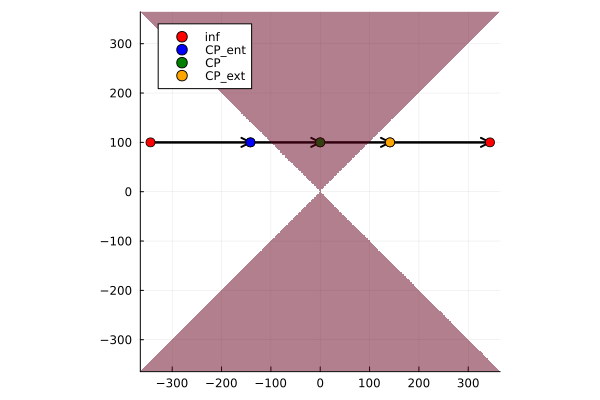

In [16]:
w = [1]
x = 200
t = 0.01;
inp = Input_sf(w,x,t)
DD = FullPath(inp)
pl = DomainPlot(DD)|>display

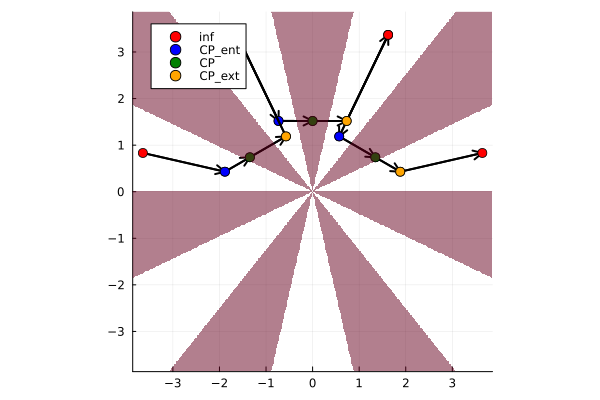

In [30]:
w = -[-2,-9,5,-1,-4,1im]
x = 100
t = 0.00000001;
inp = Input_sf(w,x,t)
DD = FullPath(inp)
pl = DomainPlot(DD)|>display

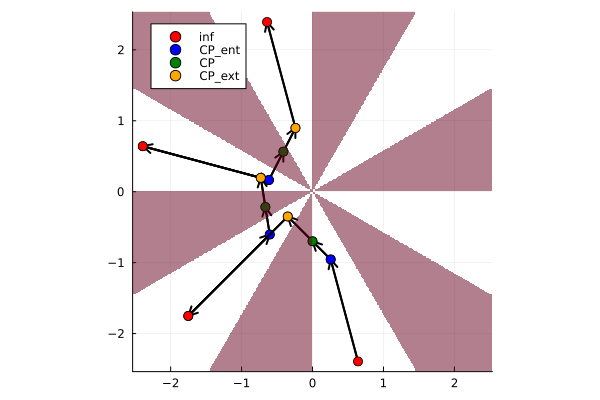

In [36]:
w = [0,0,0,0,-1im]
x = 1im
t = 0.0000000001;
inp = Input_sf(w,x,t)
DD = FullPath(inp)
pl = DomainPlot(DD)|>display

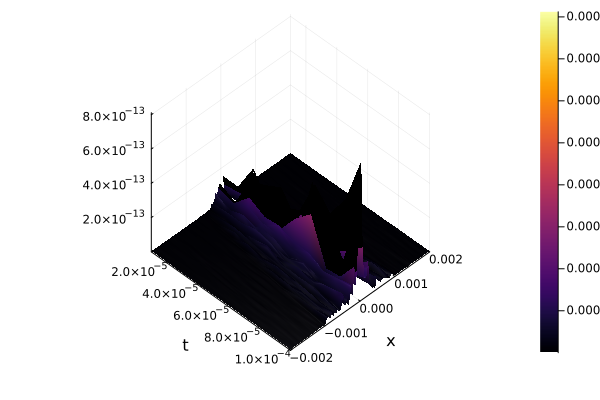

In [37]:
w = [1]
N = 200;
m = 1;

funt = (x,t) -> SpecialFunction(w, x, t, m, N);
Solu = (x,t) -> -exp(-x^2/(4*t))*sqrt(pi)*x/(2*t^(3/2));

L = 0.002
Nt = 10;
Nx = 101;
T = 0.0001
tt = T/(Nt):T/(Nt):T
xx = -L:2*L/(Nx-1):L

Qsol = Complex.(zeros(length(xx),length(tt)))
Rsol = Complex.(zeros(length(xx),length(tt)))
for i2 = 1:Nt
    Qsol[:,i2] = map(x->funt(x,tt[i2]),xx)
    Rsol[:,i2] = map(x->Solu(x,tt[i2]),xx)
end
surface(tt,xx, abs.((Qsol-Rsol)./Rsol) .+ 1e-16,camera = (45, 45), xlabel = "t", ylabel = "x")

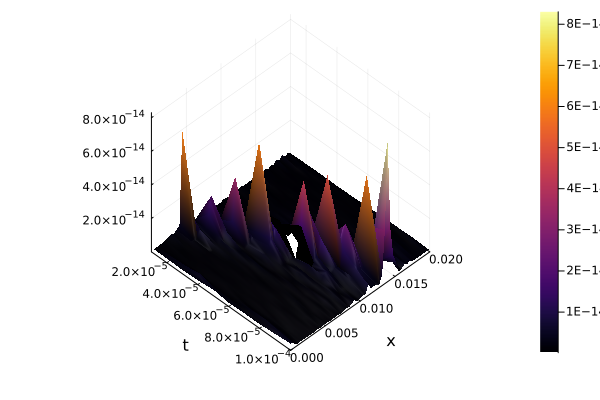

In [38]:
w = [1]
N = 200;
m = 2;

funt = (x,t) -> SpecialFunction(w, x, t, m, N);
Solu = (x,t) -> -exp(-x^2/(4*t))*sqrt(pi)*(2*t-x^2)/(4*t^(5/2));

L = 0.02
Nt = 10;
Nx = 101;
T = 0.0001
tt = T/(Nt):T/(Nt):T
xx = 0:2*L/(Nx-1):L

Qsol = Complex.(zeros(length(xx),length(tt)))
Rsol = Complex.(zeros(length(xx),length(tt)))
for i2 = 1:Nt
    Qsol[:,i2] = map(x->funt(x,tt[i2]),xx)
    Rsol[:,i2] = map(x->Solu(x,tt[i2]),xx)
end
surface(tt,xx, abs.((Qsol-Rsol)./Rsol) .+ 1e-16,camera = (45, 45), xlabel = "t", ylabel = "x")|>display

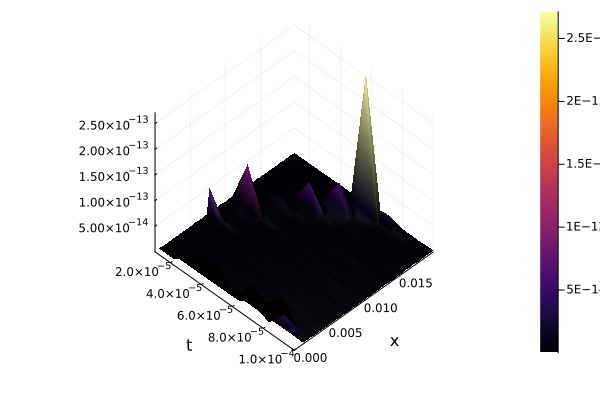

In [44]:
w = [1]
N = 200;
m = 3;

funt = (x,t) -> SpecialFunction(w, x, t, m, N);
Solu = (x,t) -> -exp(-x^2/(4*t))*sqrt(pi)*x*(-6*t+x^2)/(8*t^(7/2));

L = .02
Nt = 10;
Nx = 100;
T = 0.0001
tt = T/(Nt):T/(Nt):T
xx = 0:2*L/(Nx-1):L

Qsol = Complex.(zeros(length(xx),length(tt)))
Rsol = Complex.(zeros(length(xx),length(tt)))
for i2 = 1:Nt
    Qsol[:,i2] = map(x->funt(x,tt[i2]),xx)
    Rsol[:,i2] = map(x->Solu(x,tt[i2]),xx)
end
surface(tt,xx, abs.((Qsol-Rsol)./Rsol) .+ 1e-16,camera = (45, 45), xlabel = "t", ylabel = "x")|>display

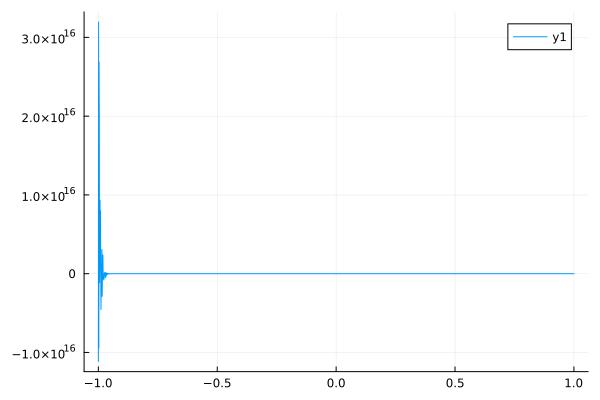

In [46]:
using SpecialFunctions
include("..\\Code_jail\\Cheb.jl")
x = -1:.001:1
w = [1]
N = 200;
m = -1;
t = 0.01
funt = x -> SpecialFunction(w, x, t, m, N);
plot(x,real.(funt.(x))/(2*pi)+erfc.(x ./ (2*sqrt(t)))/2)|>display

In [ ]:
w = [1]
N = 200;
m = 2;

funt = (x,t) -> SpecialFunction(w, x, t, m, N);
Solu = (x,t) -> -exp(-x^2/(4*t))*sqrt(pi)*(2*t-x^2)/(4*t^(5/2));

L = 0.02
Nt = 10;
Nx = 101;
T = 0.0001
tt = T/(Nt):T/(Nt):T
xx = 0:2*L/(Nx-1):L

Qsol = Complex.(zeros(length(xx),length(tt)))
Rsol = Complex.(zeros(length(xx),length(tt)))
for i2 = 1:Nt
    Qsol[:,i2] = map(x->funt(x,tt[i2]),xx)
    Rsol[:,i2] = map(x->Solu(x,tt[i2]),xx)
end
surface(tt,xx, abs.((Qsol-Rsol)./Rsol) .+ 1e-16,camera = (45, 45), xlabel = "t", ylabel = "x")|>display